<a href="https://colab.research.google.com/github/Mukul1Panwar/Deep-Learning/blob/main/Ann(Customer_churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [5]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [8]:
df.shape

(10000, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: xlabel='Exited', ylabel='count'>

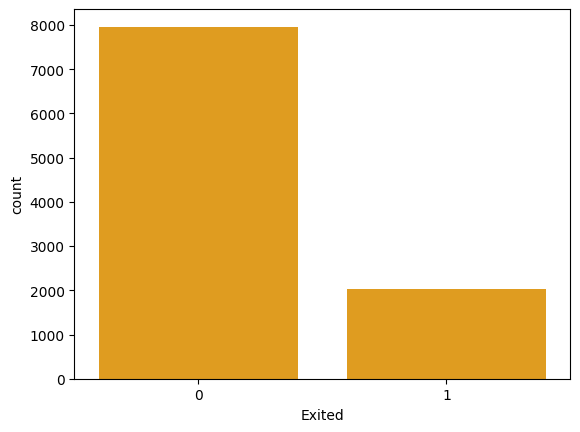

In [10]:
sns.countplot(data=df,x=df['Exited'],color='orange')

<Axes: xlabel='Age', ylabel='Count'>

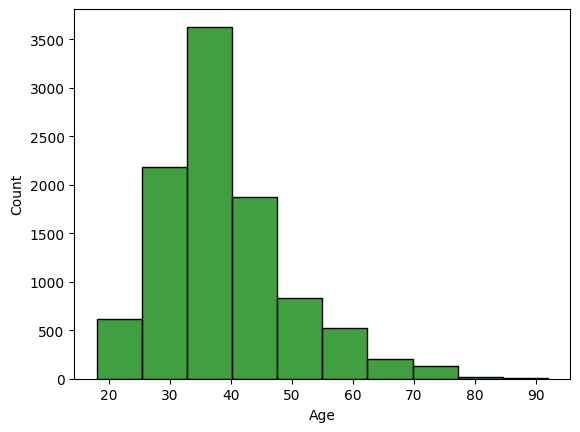

In [11]:
sns.histplot(data=df,x='Age',bins=10,color='green')

<Axes: xlabel='Gender', ylabel='count'>

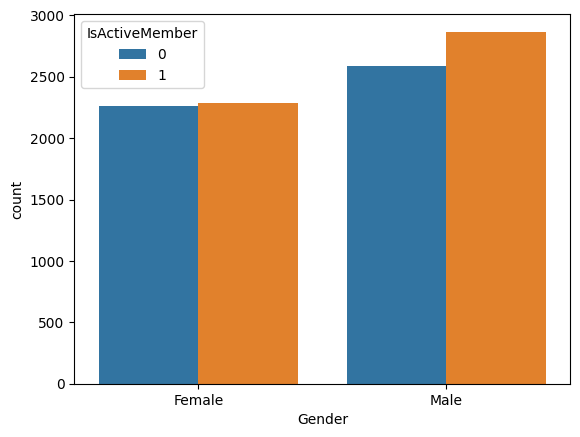

In [12]:
sns.countplot(data=df,x='Gender',hue=df["IsActiveMember"])

Text(0.5, 1.0, 'Customer Churn by each country')

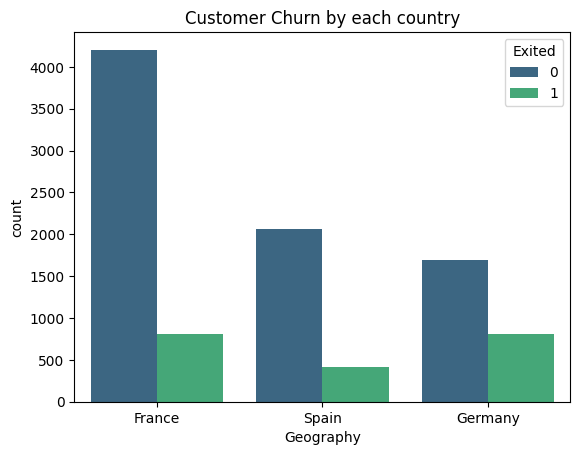

In [13]:
sns.countplot(data=df,x='Geography',hue=df['Exited'],palette='viridis')
plt.title("Customer Churn by each country")

In [16]:
num = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

cat = [ 'Geography', 'Gender']

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), cat),
        ('num', StandardScaler(), num)
    ]
)

In [18]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor)
])

In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [21]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((8000, 10), (8000,), (2000, 10), (2000,))

In [22]:
pipeline.fit(Xtrain,Ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])]))])

In [23]:
Xtrain = pipeline.transform(Xtrain)
Xtest = pipeline.transform(Xtest)

In [24]:
input_dim = Xtrain.shape[1]

In [25]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=input_dim))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=[keras.metrics.AUC(name='auc'),'accuracy'])

In [28]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Ytrain),
    y=Ytrain
)

In [29]:
class_weights = dict(enumerate(class_weights))
class_weights

{0: np.float64(0.6293266205160478), 1: np.float64(2.4330900243309004)}

In [30]:
history = model.fit(Xtrain,Ytrain,epochs=50,validation_data=(Xtest,Ytest),class_weight=class_weights,verbose=1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5213 - auc: 0.6538 - loss: 0.6669 - val_accuracy: 0.6910 - val_auc: 0.7832 - val_loss: 0.5860
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7004 - auc: 0.7732 - loss: 0.5826 - val_accuracy: 0.7350 - val_auc: 0.8166 - val_loss: 0.5296
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7261 - auc: 0.8024 - loss: 0.5494 - val_accuracy: 0.7425 - val_auc: 0.8355 - val_loss: 0.5216
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7326 - auc: 0.8254 - loss: 0.5181 - val_accuracy: 0.7530 - val_auc: 0.8445 - val_loss: 0.5010
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7506 - auc: 0.8387 - loss: 0.4945 - val_accuracy: 0.7655 - val_auc: 0.8475 - val_loss: 0.4849
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7638 - auc: 0.8403 - loss: 0.4811 - val_accuracy: 0.7580 - val_auc: 0.8494 - val_loss: 0.4889
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 

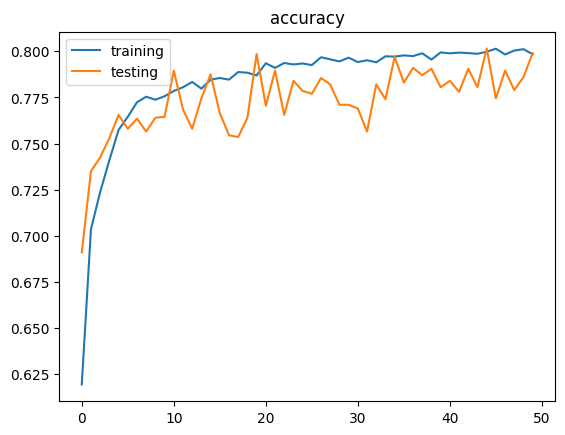

In [31]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='testing')
plt.title("accuracy")
plt.legend()
plt.show()

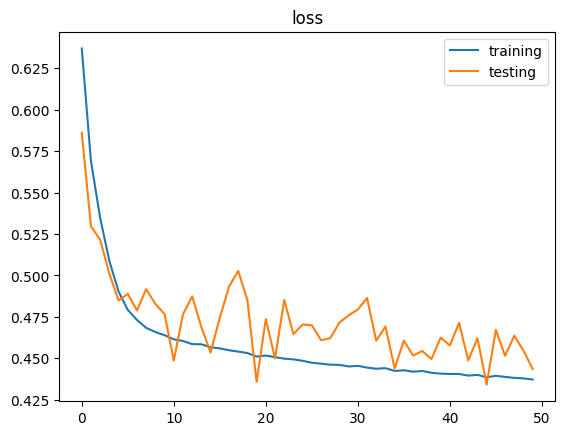

In [54]:
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='testing')
plt.title("loss")
plt.legend()
plt.show()

In [32]:
y_prob = model.predict(Xtest).ravel()
ypred = (y_prob>0.5).astype(int)
accuracy_score(Ytest,ypred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.799

In [44]:
def fun_churn(model,pipeline,input_data):
  input = pd.DataFrame([input_data])

  input1 = pipeline.transform(input)

  prediction = model.predict(input1)[0][0]

  churn = int(prediction>0.5)

  return prediction,churn

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
input_data = {
    'CreditScore': 850,
    'Geography': 'India',
    'Gender': 'male',
    'Age': 43,
    'Tenure': 1,
    'Balance': 125510.82,
    'NumOfProducts': 1,
    'HasCrCard':0,
    'IsActiveMember': 0,
    'EstimatedSalary': 79084.10
}

prediction,churn = fun_churn(model,pipeline,input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [53]:
print(f"Churn Prediction: {churn} (1 = will Churn, 0 = Will Stay)")
print(f"Churn Probability: {prediction:.2%}")

Churn Prediction: 1 (1 = will Churn, 0 = Will Stay)
Churn Probability: 67.97%
